In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df = pd.read_csv("BMW sales data.csv")

df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [25]:
print("Shape of dataset:", df.shape)
df.columns
print("\nColumn names:\n", df.columns.tolist())
print("\n")
print("Missing values before cleaning:\n", df.isnull().sum())
duplicate_count = df.duplicated().sum()
print(duplicate_count)


Shape of dataset: (50000, 11)

Column names:
 ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']


Missing values before cleaning:
 Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64
0


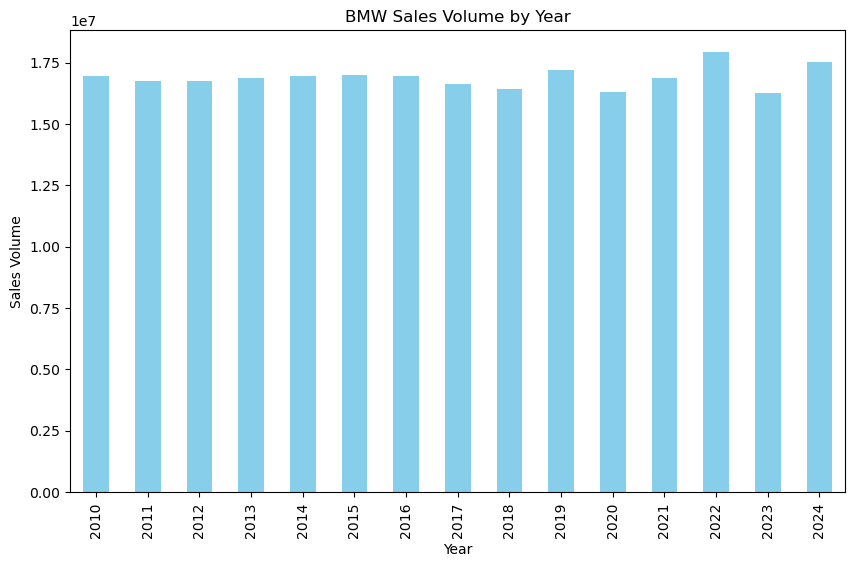

In [26]:
yearly_sales = df.groupby('Year')['Sales_Volume'].sum()

plt.figure(figsize=(10,6))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title("BMW Sales Volume by Year")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.show()


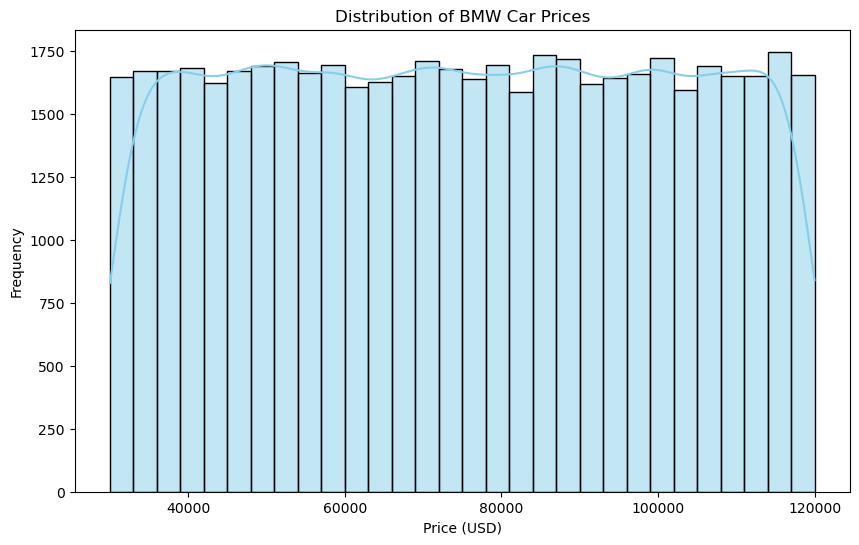

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price_USD'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of BMW Car Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

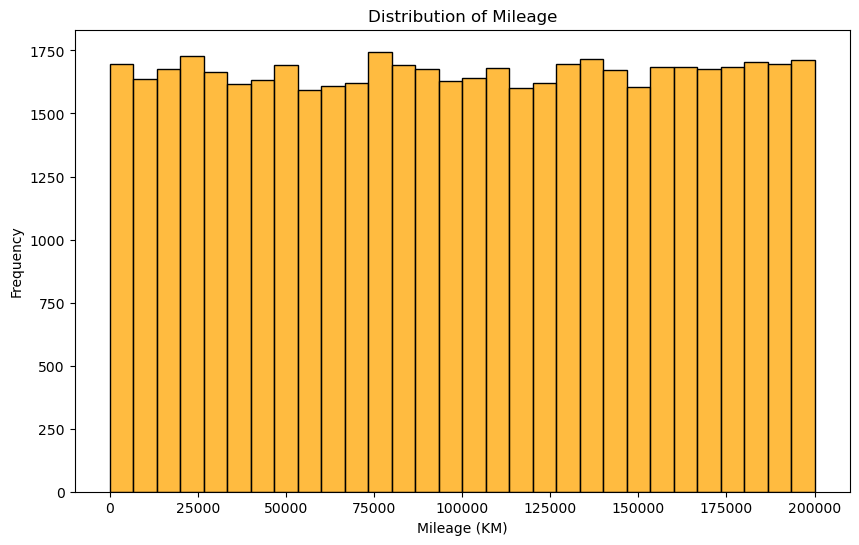

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df['Mileage_KM'], bins=30, color='orange')
plt.title("Distribution of Mileage")
plt.xlabel("Mileage (KM)")
plt.ylabel("Frequency")
plt.show()

In [29]:
print("\nAverage Price by Sales Classification:")
print(df.groupby('Sales_Classification')['Price_USD'].mean())

print("\nTotal Sales Volume by Sales Classification:")
print(df.groupby('Sales_Classification')['Sales_Volume'].sum())


Average Price by Sales Classification:
Sales_Classification
High    74966.819756
Low     75064.335357
Name: Price_USD, dtype: float64

Total Sales Volume by Sales Classification:
Sales_Classification
High    129552829
Low     123822905
Name: Sales_Volume, dtype: int64


In [30]:
numerical_cols = ['Price_USD', 'Mileage_KM', 'Engine_Size_L', 'Sales_Volume']

for col in numerical_cols:
    mean_val = df[col].mean()
    var_val = df[col].var()
    mode_val = df[col].mode()[0]
    print(f"{col} -> Mean: {mean_val:.2f}, Variance: {var_val:.2f}, Mode: {mode_val}")


Price_USD -> Mean: 75034.60, Variance: 675908944.92, Mode: 30948
Mileage_KM -> Mean: 100307.20, Variance: 3357218505.01, Mode: 136842
Engine_Size_L -> Mean: 3.25, Variance: 1.02, Mode: 3.8
Sales_Volume -> Mean: 5067.51, Variance: 8161118.41, Mode: 9502


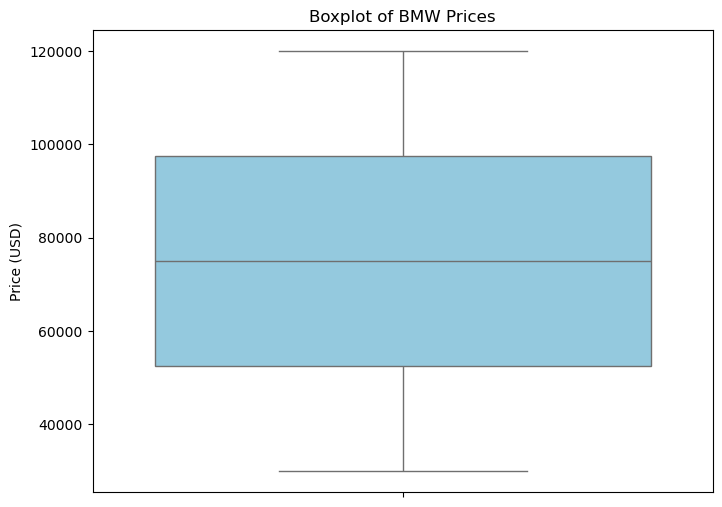

In [31]:

plt.figure(figsize=(8,6))
sns.boxplot(y=df['Price_USD'], color='skyblue')
plt.title('Boxplot of BMW Prices')
plt.ylabel('Price (USD)')
plt.show()


Price_USD -> Mean: 75034.60, Variance: 675908944.92, Mode: 30948
Price_USD Skewness: -0.00

Mileage_KM -> Mean: 100307.20, Variance: 3357218505.01, Mode: 136842
Mileage_KM Skewness: -0.01

Engine_Size_L -> Mean: 3.25, Variance: 1.02, Mode: 3.8
Engine_Size_L Skewness: -0.00

Sales_Volume -> Mean: 5067.51, Variance: 8161118.41, Mode: 9502
Sales_Volume Skewness: -0.01



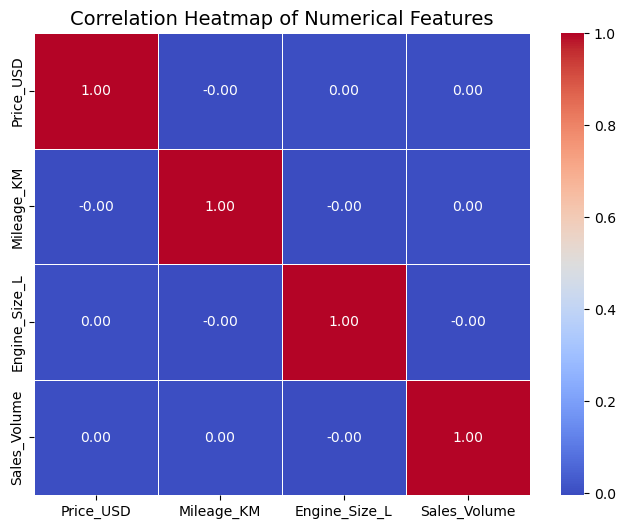

In [32]:
numerical_cols = ['Price_USD', 'Mileage_KM', 'Engine_Size_L', 'Sales_Volume']

for col in numerical_cols:
    print(f"{col} -> Mean: {df[col].mean():.2f}, Variance: {df[col].var():.2f}, Mode: {df[col].mode()[0]}")
    print(f"{col} Skewness: {df[col].skew():.2f}\n")


corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


                   Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume
Year           1.000000      -0.001944    0.008741   0.003547      0.001671
Engine_Size_L -0.001944       1.000000   -0.004906   0.000146     -0.003942
Mileage_KM     0.008741      -0.004906    1.000000  -0.004238      0.001434
Price_USD      0.003547       0.000146   -0.004238   1.000000      0.000080
Sales_Volume   0.001671      -0.003942    0.001434   0.000080      1.000000


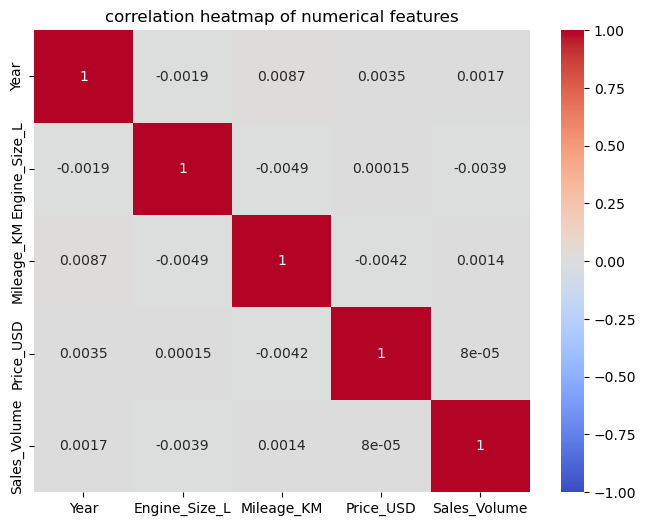

In [33]:
num_df = df.select_dtypes(include=['int64','float64'])
corr = num_df.corr()
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('correlation heatmap of numerical features')
plt.show()

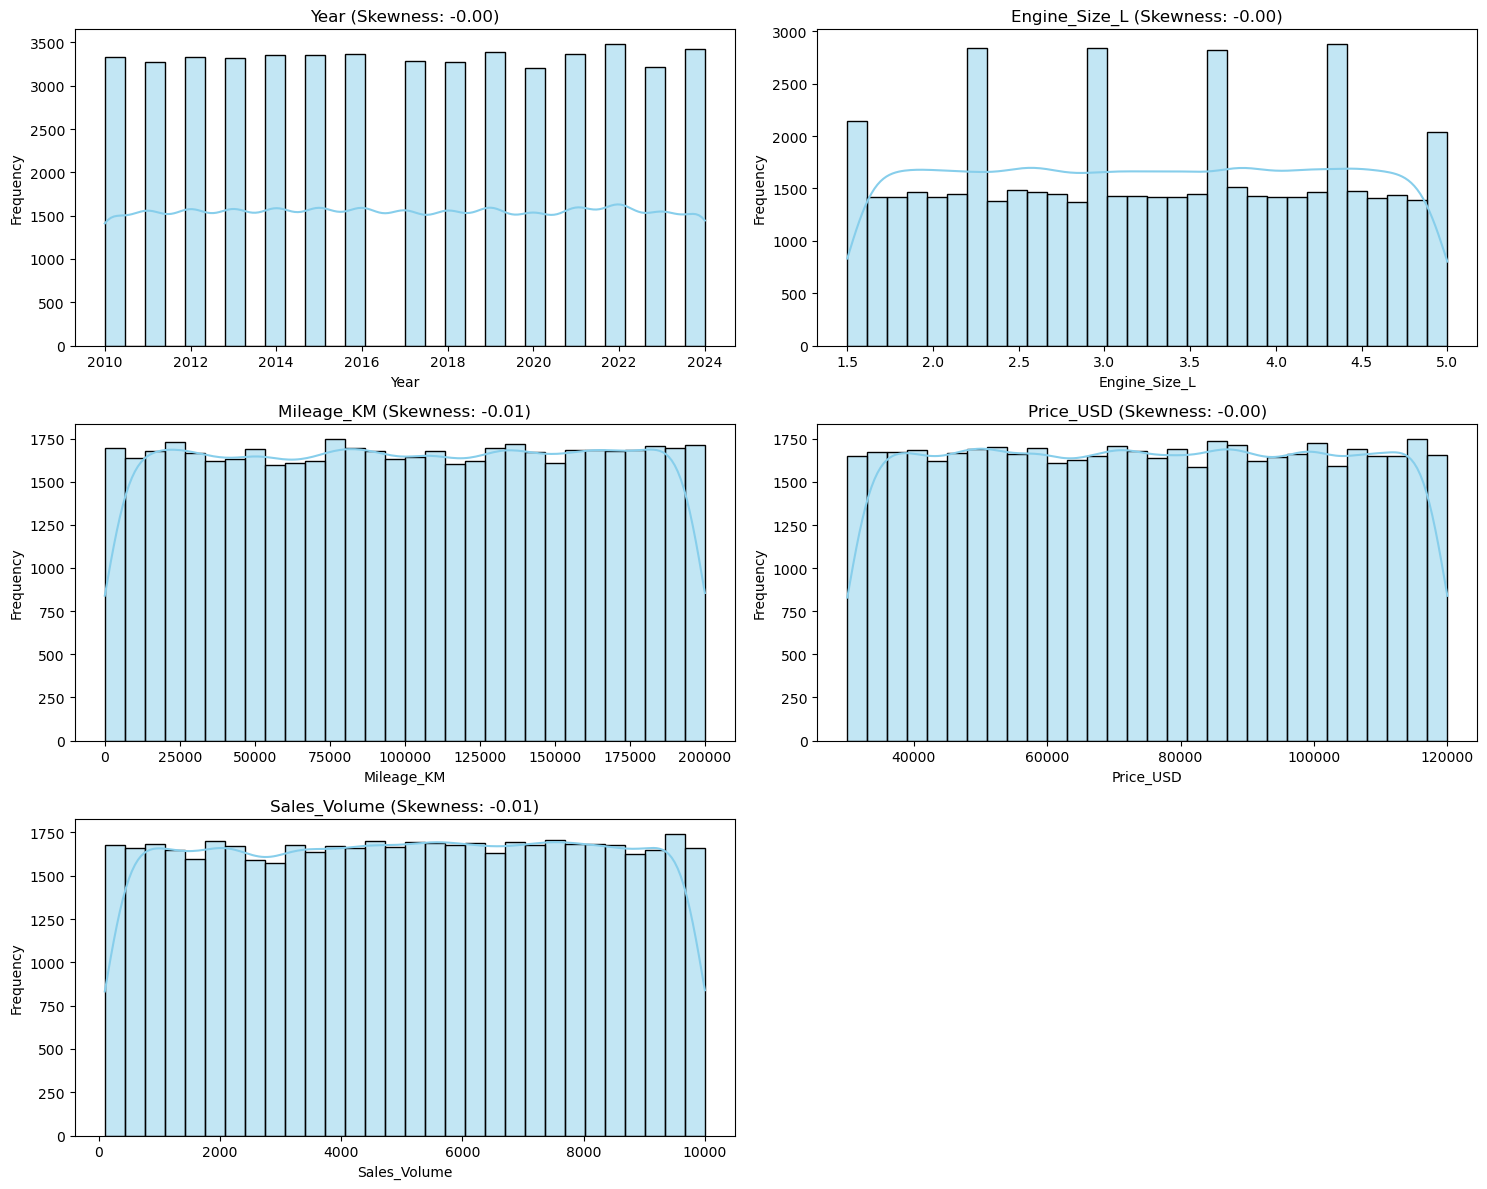

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns layout (enough for 5 plots)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"{col} (Skewness: {df[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
